In [13]:
import pandas as pd
import numpy as np
ul75protein = pd.read_csv('UL75proteins.csv')
ul75protein 

,accession,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,KP745634,M,R,P,G,P,P,S,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
1,KR534210,M,R,P,G,L,P,P,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
2,KR534203,M,R,P,G,L,P,P,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
3,KJ872542,M,R,P,G,L,P,P,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
4,KU550090,M,R,P,G,L,P,P,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,MT044478,M,R,P,G,L,P,S,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
245,JX512199,M,R,P,G,L,P,S,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
246,KP745643,M,R,P,G,L,P,S,Y,L,...,Y,L,L,Y,R,M,L,K,T,C
247,KY490065,M,R,P,G,L,P,S,Y,L,...,Y,L,L,Y,R,M,L,K,T,C


In [17]:
ul75protein2 = pd.melt(ul75protein,id_vars=['accession'],var_name='position',value_name='aminoacid')
ul75protein2

,accession,position,aminoacid
0,KP745634,1,M
1,KR534210,1,M
2,KR534203,1,M
3,KJ872542,1,M
4,KU550090,1,M
...,...,...,...
185002,MT044478,743,C
185003,JX512199,743,C
185004,KP745643,743,C
185005,KY490065,743,C


In [130]:
ul75protein3 = ul75protein2.groupby(['position','aminoacid']).count()
ul75protein3

accession
position aminoacid           
1        M                249
10       I                128
         T                121
100      G                249
101      P                249
...                       ...
96       C                249
97       L                249
98       F                249
99       A                248
         T                  1

[842 rows x 1 columns]

In [131]:
ul75protein4 = ul75protein3.groupby('position').count()
ul75protein4

,accession
position,
1,1
10,2
100,1
101,1
102,1
...,...
95,1
96,1
97,1


In [132]:
ul75protein4.index.name = 'residue'
ul75protein4.reset_index(inplace=True)
ul75protein4

,residue,accession
0,1,1
1,10,2
2,100,1
3,101,1
4,102,1
...,...,...
738,95,1
739,96,1
740,97,1
741,98,1


In [133]:
ul75protein4['residue'] = pd.to_numeric(ul75protein4['residue'])
ul75protein4['accession'] = pd.to_numeric(ul75protein4['accession'])
ul75protein4.dtypes
ul75protein4

,residue,accession
0,1,1
1,10,2
2,100,1
3,101,1
4,102,1
...,...,...
738,95,1
739,96,1
740,97,1
741,98,1


In [134]:
ul75protein4.sort_values(by='residue',inplace=True)
ul75protein4

,residue,accession
0,1,1
111,2,1
222,3,1
333,4,1
444,5,2
...,...,...
710,739,1
712,740,1
713,741,1
714,742,1


In [136]:
ul75protein5 = ul75protein4.groupby(['accession']).count()
ul75protein5

,residue
accession,
1,661
2,68
3,11
4,3


<AxesSubplot:xlabel='accession'>

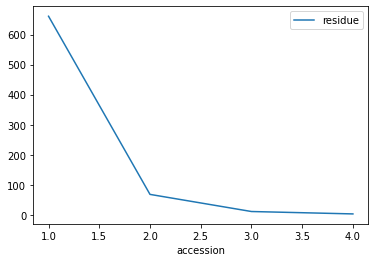

In [140]:
# ul75protein5.columns = ['residue','polymorphism']
# ul75protein4.columns = ['position','polymorphism']
# ul75protein4
import matplotlib.pyplot as plt
ul75protein5.plot()

In [141]:
from collections import OrderedDict, defaultdict
ul75protein5.to_dict(into=OrderedDict)

OrderedDict([('residue', OrderedDict([(1, 661), (2, 68), (3, 11), (4, 3)]))])